In [1]:
import pandas as pd
import numpy as np
import os,sys
import ROOT as rt

Welcome to JupyROOT 6.26/02


In [26]:
save_ = True

In [2]:
data = pd.read_csv('Fig7_NeutronONDistribution.txt', delimiter='\t',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,X_SbBe70V,Y_SbBe70V,ErrorX_SbBe70V,ErrorY_SbBe70V,X_Sb70fit,Y_Sb70fit,ErrorX_Sb70fit,ErrorY_Sb70fit,X_Sb70bkg,Y_Sb70bkg,...,X_YBe25V,Y_YBe25V,ErrorX_YBe25V,ErrorY_YBe25V,X_Y25fit,Y_Y25fit,ErrorX_Y25fit,ErrorY_Y25fit,X_Y25bkg,Y_Y25bkg
1,2.49677,1372.82,0.0965398,69.074,2.4,1463.21,0.193467,0.000195797,2.4,300.275,...,2.91402,16357.9,0.710207,280.908,2.2,16704.6,0.134233,0.0000458355,2.2,7794.33
2,2.68994,1063.5,0.0965398,60.7962,2.78732,1139.05,0.193467,0.000121701,2.78732,288.336,...,4.34203,14848,0.710207,267.63,2.46874,16378.8,0.134233,0.0000398024,2.46874,7801.25
3,2.88312,914.053,0.0965398,56.3629,3.17464,945.651,0.193467,0.000183925,3.17464,269.391,...,5.77004,14134.1,0.710207,261.116,2.73747,16114.7,0.134233,0.0000395076,2.73747,7821.28
4,3.07629,910.578,0.0965398,56.2557,3.56196,824.565,0.193467,0.000175384,3.56196,261.898,...,7.19805,13815.7,0.710207,258.158,3.00621,15900.3,0.134233,0.0000411622,3.00621,7852.3


In [3]:
data.columns = [i for i in data.iloc[0]]
title = [i for i in data.iloc[0]]
data = data.drop([0])
data.head()

,X_SbBe70V,Y_SbBe70V,ErrorX_SbBe70V,ErrorY_SbBe70V,X_Sb70fit,Y_Sb70fit,ErrorX_Sb70fit,ErrorY_Sb70fit,X_Sb70bkg,Y_Sb70bkg,...,X_YBe25V,Y_YBe25V,ErrorX_YBe25V,ErrorY_YBe25V,X_Y25fit,Y_Y25fit,ErrorX_Y25fit,ErrorY_Y25fit,X_Y25bkg,Y_Y25bkg
1,2.49677,1372.82,0.0965398,69.074,2.4,1463.21,0.193467,0.000195797,2.4,300.275,...,2.91402,16357.9,0.710207,280.908,2.2,16704.6,0.134233,0.0000458355,2.2,7794.33
2,2.68994,1063.5,0.0965398,60.7962,2.78732,1139.05,0.193467,0.000121701,2.78732,288.336,...,4.34203,14848,0.710207,267.63,2.46874,16378.8,0.134233,0.0000398024,2.46874,7801.25
3,2.88312,914.053,0.0965398,56.3629,3.17464,945.651,0.193467,0.000183925,3.17464,269.391,...,5.77004,14134.1,0.710207,261.116,2.73747,16114.7,0.134233,0.0000395076,2.73747,7821.28
4,3.07629,910.578,0.0965398,56.2557,3.56196,824.565,0.193467,0.000175384,3.56196,261.898,...,7.19805,13815.7,0.710207,258.158,3.00621,15900.3,0.134233,0.0000411622,3.00621,7852.3
5,3.26947,868.872,0.0965398,54.9523,3.94928,729.331,0.193467,0.0000989957,3.94928,261.737,...,8.62606,13762.6,0.710207,257.662,3.27494,15723.1,0.134233,0.000043435,3.27494,7891.75


In [4]:
title

['X_SbBe70V',
 'Y_SbBe70V',
 'ErrorX_SbBe70V',
 'ErrorY_SbBe70V',
 'X_Sb70fit',
 'Y_Sb70fit',
 'ErrorX_Sb70fit',
 'ErrorY_Sb70fit',
 'X_Sb70bkg',
 'Y_Sb70bkg',
 'X_YBe70V',
 'Y_YBe70V',
 'ErrorX_YBe70V',
 'ErrorY_YBe70V',
 'X_Y70fit',
 'Y_Y70fit',
 'ErrorX_Y70fit',
 'ErrorY_Y70fit',
 'X_Y70bkg',
 'Y_Y70bkg',
 'X_YBe25V',
 'Y_YBe25V',
 'ErrorX_YBe25V',
 'ErrorY_YBe25V',
 'X_Y25fit',
 'Y_Y25fit',
 'ErrorX_Y25fit',
 'ErrorY_Y25fit',
 'X_Y25bkg',
 'Y_Y25bkg']

In [7]:
title = np.array([temp.split('_')[-1] for temp in title])
title = np.unique(title)
title

array(['Sb70bkg', 'Sb70fit', 'SbBe70V', 'Y25bkg', 'Y25fit', 'Y70bkg',
       'Y70fit', 'YBe25V', 'YBe70V'], dtype='<U7')

In [8]:
sources = ['Sb70','Y70','Y25']
# cols = {
#     sources[0] : ['']
# }

cols = {}
temp_Sb = []
temp_Y70 = []
temp_Y25 = []
for i in title:
    temp = []
    if('Sb' in i):
        temp_Sb.append(i)
    elif(('Y' in i) and ('70' in i)):
        temp_Y70.append(i)
    else:
        temp_Y25.append(i)

cols = {
    'Sb70' : temp_Sb,
    'Y70' : temp_Y70,
    'Y25' : temp_Y25
}

print (sources[0],' : ',cols[sources[0]])
print (sources[1],' : ',cols[sources[1]])
print (sources[2],' : ',cols[sources[2]])


Sb70  :  ['Sb70bkg', 'Sb70fit', 'SbBe70V']
Y70  :  ['Y70bkg', 'Y70fit', 'YBe70V']
Y25  :  ['Y25bkg', 'Y25fit', 'YBe25V']


In [12]:
graphs = {}
temp_Sb = []
temp_Y70 = []
temp_Y25 = []
for src in sources:
    temp_list = []
    for col in cols[src]:
        non_null = data['X_%s'%(col)].notna()
        x = pd.to_numeric(data['X_%s'%(col)][non_null], errors='coerce')
        y = pd.to_numeric(data['Y_%s'%(col)][non_null], errors='coerce')
        ex = pd.to_numeric(np.zeros(len(x)))
        ey = pd.to_numeric(np.zeros(len(x)))
        
        if(not('bkg' in col)):
            ex = pd.to_numeric(data['ErrorX_%s'%(col)][non_null], errors='coerce')
            ey = pd.to_numeric(data['ErrorY_%s'%(col)][non_null], errors='coerce')
        
        temp_gr = rt.TGraphErrors()
        temp_gr.SetName(col)

        for j in range(len(x)):
            temp_gr.SetPoint(j,(x.iloc[j]),y.iloc[j])
            if(not('bkg' in col)):
                temp_gr.SetPointError(j,ex.iloc[j],ey.iloc[j])
            else:
                temp_gr.SetPointError(j,ex[j],ey[j])
        temp_list.append(temp_gr)
        del temp_gr
    graphs[src] = temp_list
            


In [15]:
graphs['Sb70'][2].GetName()

'SbBe70V'

In [17]:
line_color = [rt.kBlue, rt.kRed, rt.kBlack]
marker_color = [rt.kBlue, rt.kRed, rt.kBlack]
xrange = {
    'Sb70' : [1.8, 22.2],
    'Y70' : [0, 250.0],
    'Y25' : [0, 140.0]
}
yrange = {
    'Sb70' : [0, 1.4e3],
    'Y70' : [1e3, 4.5e3],
    'Y25' : [6.e3, 17e3]
}
ytitle = {
    'Sb70' : 'Counts/0.2 keV',
    'Y70' : 'Counts/2.4 keV',
    'Y25' : 'Counts/1.4 keV'
}

0 : Graph for Y25bkg
1 : Graph for Y25fit
2 : Graph for YBe25V
Plots saved!!


Info in <TCanvas::Print>: png file ./plots/png/Fig_7c.png has been created
Info in <TCanvas::Print>: pdf file ./plots/pdf/Fig_7c.pdf has been created


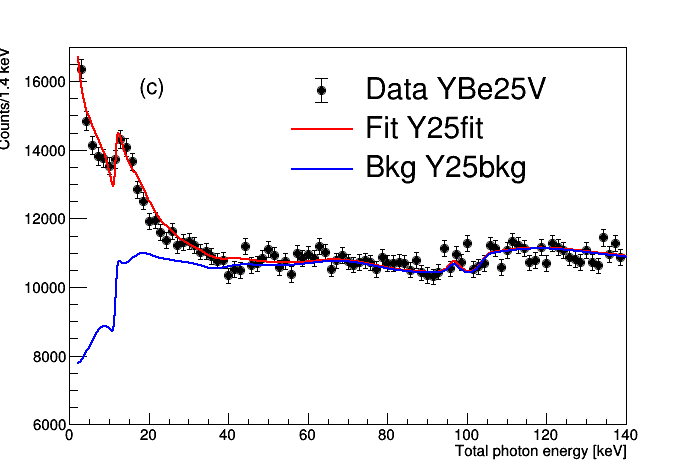

In [29]:
src = sources[2]
textlatex = {
    sources[0] : 'a',
    sources[1] : 'b',
    sources[2] : 'c'
}
c = rt.TCanvas()
count = 0
legend = rt.TLegend(0.4,0.85,0.9,0.6)
#legend.SetNColumns(3)
legend.SetBorderSize(0)

for i,graph in enumerate(graphs[src]):
    print ('%d : Graph for %s'%(i,graph.GetName()))
    if(i == 2):
        graph.SetMarkerColor(marker_color[i])
        graph.SetMarkerStyle(rt.kFullCircle)
        graph.SetMarkerSize(1.2)
    else:
        graph.SetLineColor(line_color[i])
        graph.SetLineWidth(2)
    graph.GetYaxis().SetRangeUser(yrange[src][0],yrange[src][1])
    graph.GetXaxis().SetLimits(xrange[src][0],xrange[src][1])
    
#     if(not count):
#         #graph.Draw("AL3")
        
#         #graph.Draw("AL3")
#         count += 1
#     else:
#         graph.Draw("L3 SAME")
        
    
    
    graph.GetXaxis().SetTitle('Total photon energy [keV]')
    graph.GetYaxis().SetTitle(ytitle[src])
    

    
legend.AddEntry(graphs[src][2],'Data %s'%(graphs[src][2].GetName()),"pe")
legend.AddEntry(graphs[src][1],'Fit %s'%(graphs[src][1].GetName()),"l")
legend.AddEntry(graphs[src][0],'Bkg %s'%(graphs[src][0].GetName()),"l")

graphs[src][2].Draw('APE')
graphs[src][1].Draw('L3 SAME')
graphs[src][0].Draw('L3 SAME')
legend.Draw()
c.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.05);

textOnTop.DrawLatexNDC(0.2,0.8,"#bf{(%s)}"%(textlatex[src]));

if(save_):
    c.SaveAs('./plots/png/Fig_7%s.png'%(textlatex[src]))
    c.SaveAs('./plots/pdf/Fig_7%s.pdf'%(textlatex[src]))
    print ('Plots saved!!')